In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("AirPassengers.csv")

In [9]:
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

df["Date"] = df["Time"].apply(year_fraction_to_datetime)
ts = df.set_index("Date")["AirPassengers"].asfreq("MS")

In [10]:
ts_raw  = ts
ts_sqrt = np.sqrt(ts)
ts_log  = np.log(ts)

In [12]:
ma_raw  = ts_raw.rolling(window=12, center=True).mean()
ma_sqrt = ts_sqrt.rolling(window=12, center=True).mean()
ma_log  = ts_log.rolling(window=12, center=True).mean()

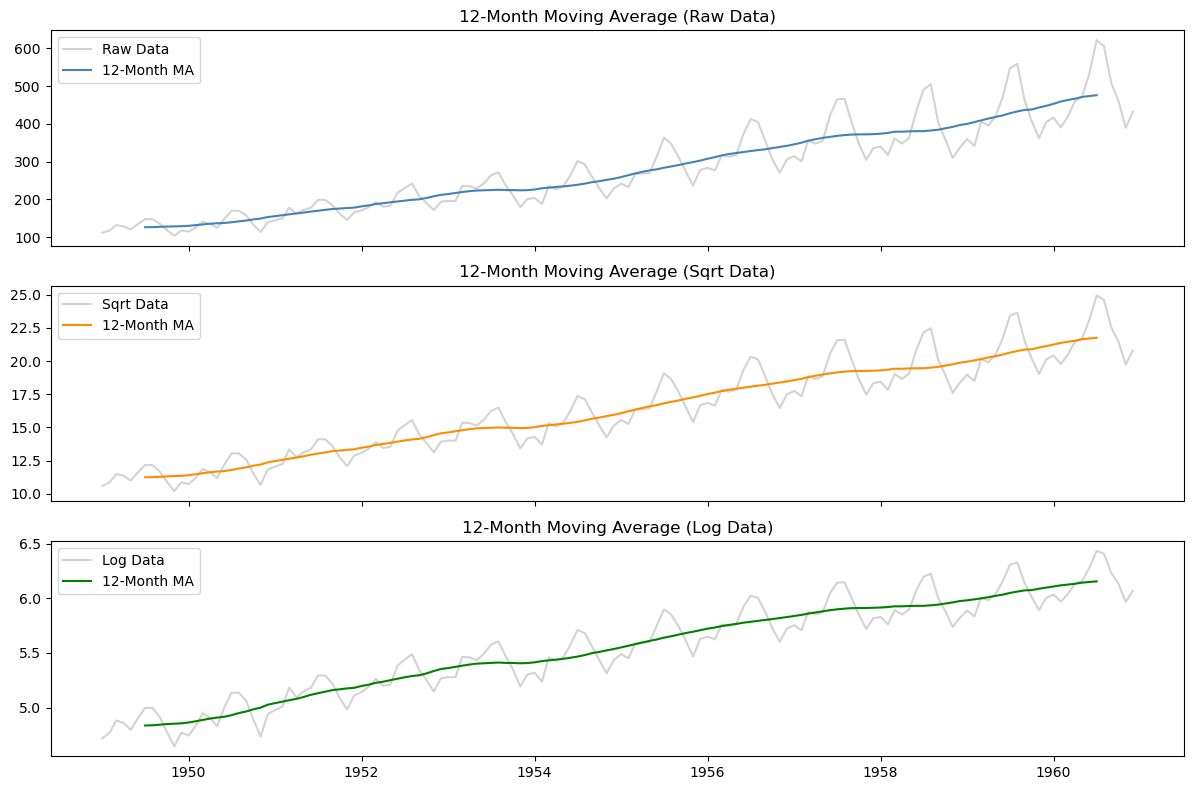

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(12,8), sharex=True)

axes[0].plot(ts_raw, color="lightgray", label="Raw Data")
axes[0].plot(ma_raw, color="steelblue", label="12-Month MA")
axes[0].set_title("12-Month Moving Average (Raw Data)")
axes[0].legend()

axes[1].plot(ts_sqrt, color="lightgray", label="Sqrt Data")
axes[1].plot(ma_sqrt, color="darkorange", label="12-Month MA")
axes[1].set_title("12-Month Moving Average (Sqrt Data)")
axes[1].legend()

axes[2].plot(ts_log, color="lightgray", label="Log Data")
axes[2].plot(ma_log, color="green", label="12-Month MA")
axes[2].set_title("12-Month Moving Average (Log Data)")
axes[2].legend()

plt.tight_layout()
plt.show()